# Libraries

# Collect Data

In [2]:
# If you're using Google Colab, you need to install these packages first
!pip install pingouin datasist geopy category_encoders imbalanced-learn

# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (18, 8)}, style='darkgrid')
sns.set_palette('rocket')

from time import time
import pingouin
from scipy.stats import ttest_ind
from datasist.structdata import detect_outliers
from geopy.distance import great_circle
from category_encoders import WOEEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Now, you can proceed with your data analysis or machine learning tasks


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv(r"/content/drive/MyDrive/data/fraudTrain.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test = pd.read_csv(r"/content/drive/MyDrive/data/fraudTest.csv")
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
#The test data also contains is_fraud it's not separated to test our model
#So we will concat. them togther to clean them, then make our predictions on test data without is_fraud

In [ ]:
train['split'] = 'train'
test['split']='test'
df = pd.concat([train,test],axis=0).reset_index(drop=True)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


# Data Preprocessing



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [ ]:
#Check Nulls
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#We found no duplicated rows, so each row is a unique transaction
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'split'],
      dtype='object')

In [ ]:
#Drop unnecessary columns
#We will drop lcoation of customer as we will get the distance between
#Merchant and customer location later
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,split
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,train
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,train
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,train
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,train
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,train


In [ ]:
#Change date type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [ ]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

In [ ]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [ ]:
df[['merchant']].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


In [ ]:
#Date of birth --> Age of customer
df['dob'] = pd.to_datetime(df['dob'],format='mixed')
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
#df.drop(columns='dob',inplace=True)

In [ ]:
#Location between customer home and merchant
df['distance_km'] = df.apply(lambda col : round(great_circle((col['lat'],col['long']),
                                         (col['merch_lat'],col['merch_long'])).kilometers,2),axis=1)

In [ ]:
df.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)

In [ ]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,split,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0,train,0,Tuesday,1,31,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0,train,0,Tuesday,1,41,30.21


# EDA

In [ ]:
#Summary stats
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,1852394,2020-01-20 21:31:46.801827328,2019-01-01 00:00:18,2019-07-23 04:13:43.750000128,2020-01-02 01:15:31,2020-07-23 12:11:25.249999872,2020-12-31 23:59:34,NaN
cc_num,1852394.0,417386038393710400.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0,1309115265318734848.0
amt,1852394.0,70.063567,1.0,9.64,47.45,83.1,28948.9,159.253975
zip,1852394.0,48813.258191,1257.0,26237.0,48174.0,72042.0,99921.0,26881.845966
city_pop,1852394.0,88643.674509,23.0,741.0,2443.0,20328.0,2906700.0,301487.618344
dob,1852394,1973-10-15 11:05:05.744458256,1924-10-30 00:00:00,1962-08-13 00:00:00,1975-11-30 00:00:00,1987-04-23 00:00:00,2005-01-29 00:00:00,NaN
is_fraud,1852394.0,0.00521,0.0,0.0,0.0,0.0,1.0,0.071992
hour,1852394.0,12.806119,0.0,7.0,14.0,19.0,23.0,6.815753
month,1852394.0,7.152067,1.0,4.0,7.0,10.0,12.0,3.424954
age,1852394.0,46.21138,14.0,33.0,44.0,57.0,96.0,17.395446


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
merchant,1852394,693,Kilback LLC,6262
category,1852394,14,gas_transport,188029
gender,1852394,2,F,1014749
city,1852394,906,Birmingham,8040
job,1852394,497,Film/video editor,13898
split,1852394,2,train,1296675
day,1852394,7,Monday,369418


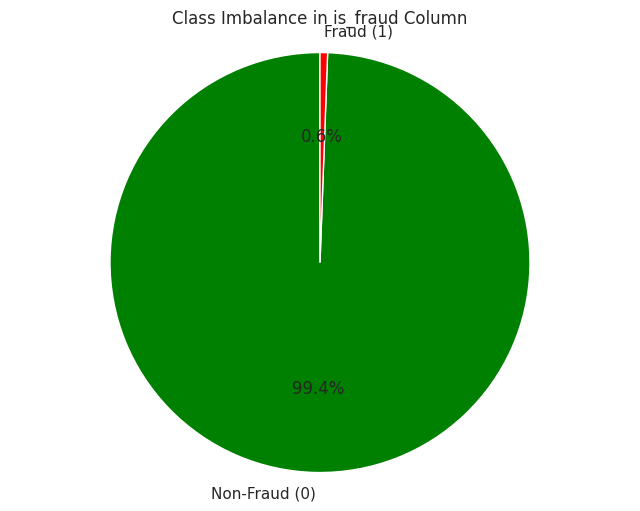

In [ ]:
# Calculate the counts for each class (0 = Non-Fraud, 1 = Fraud)
fraud_counts = train['is_fraud'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Class Imbalance in is_fraud Column')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show the plot
plt.show()

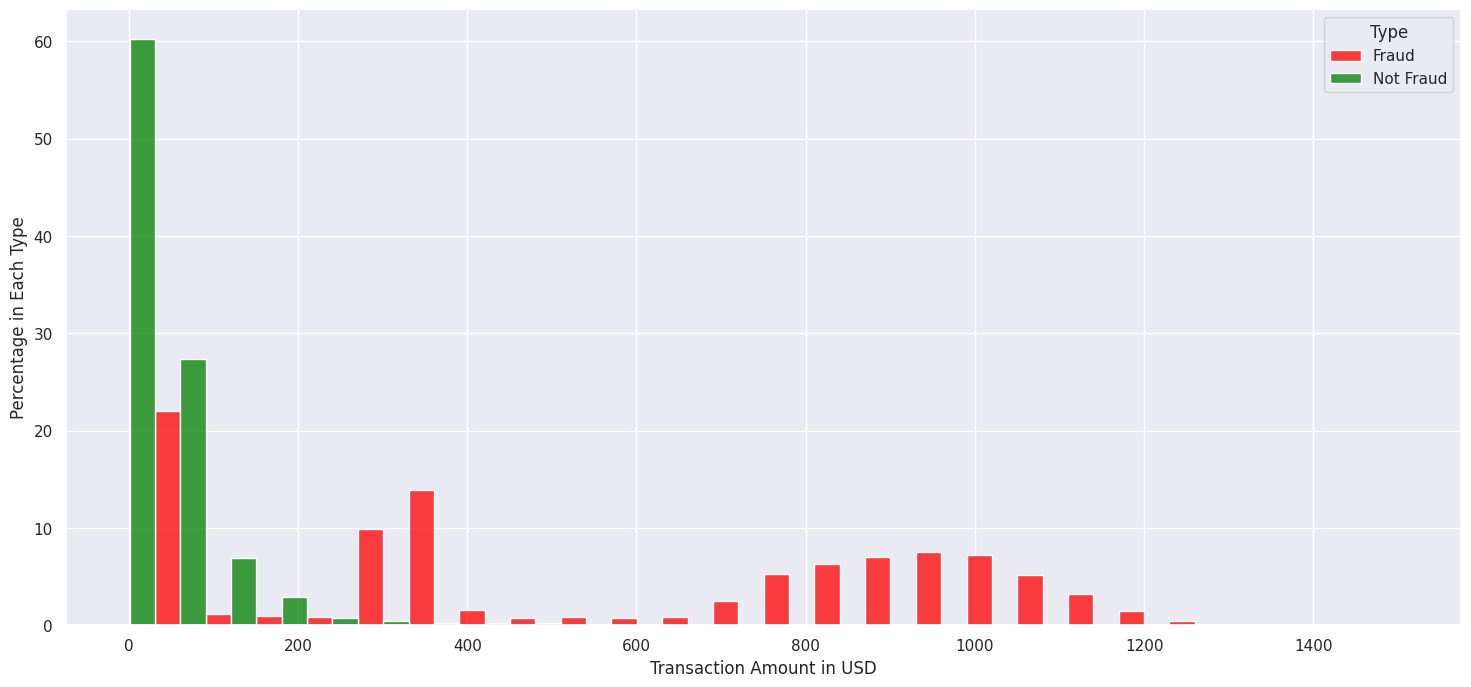

In [ ]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1500],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25, palette={1: 'red', 0: 'green'})
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

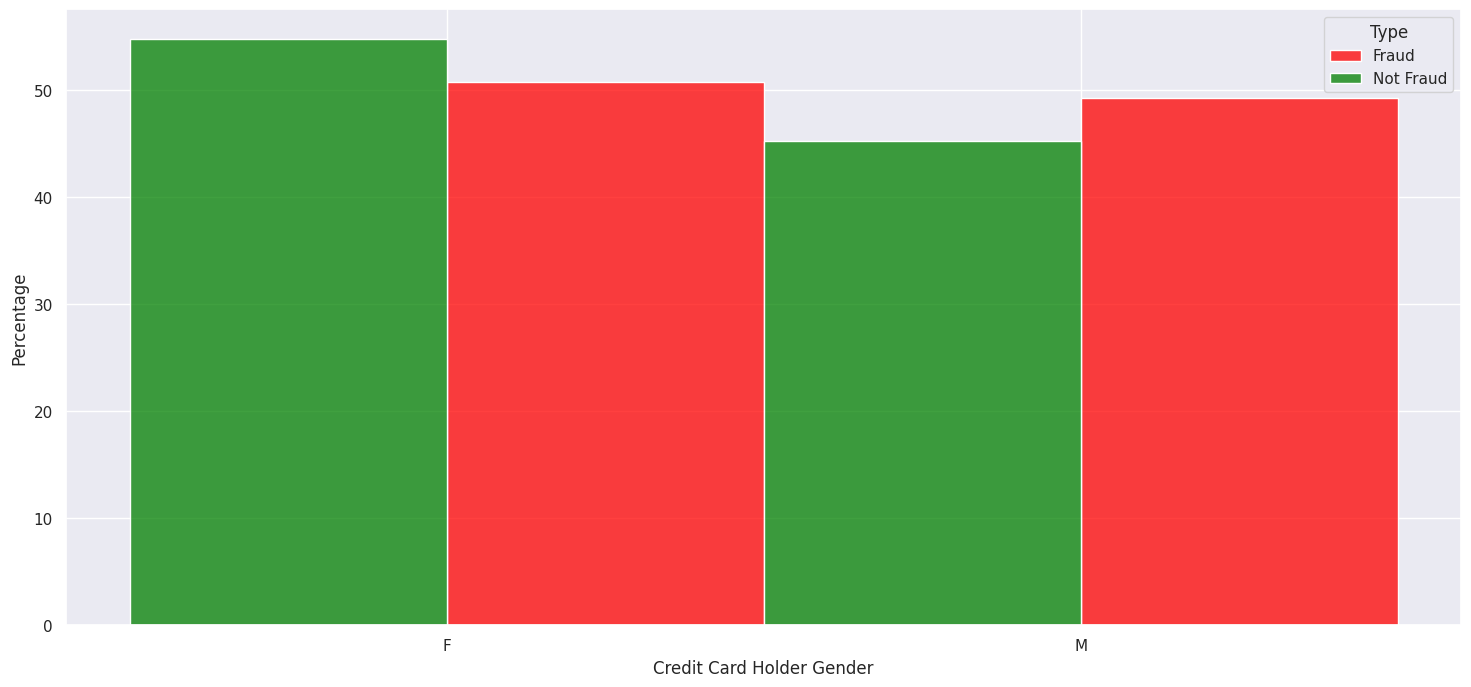

In [ ]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False, palette={1: 'red', 0: 'green'})
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

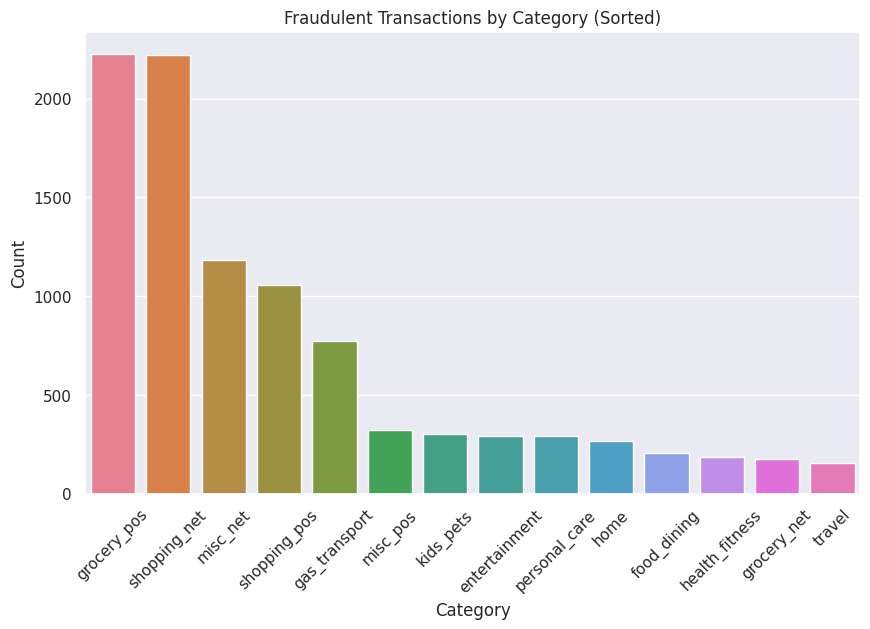

In [ ]:
# Calculate the count of each category and sort in descending order
category_counts = df[df['is_fraud'] == 1].category.value_counts().sort_values(ascending=False)

# Create a count plot with sorted categories and multiple colors
plt.figure(figsize=(10, 6))

# Define a custom color palette or use a predefined palette
colors = sns.color_palette('husl', len(category_counts))  # 'husl' is an example; you can change this

# Create the bar plot with the color palette
sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by Category (Sorted)')
plt.show()


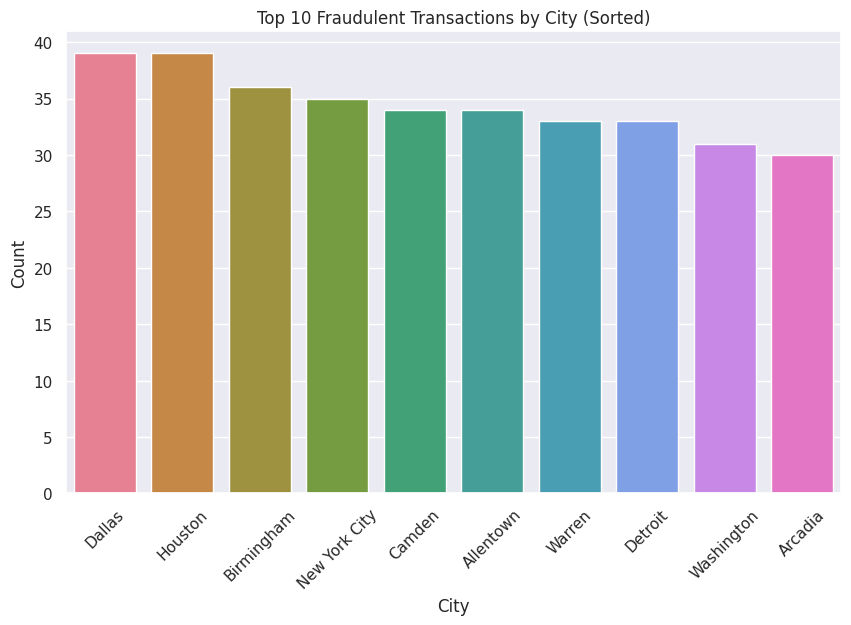

In [ ]:
# Calculate the count of each city and sort in descending order for fraudulent transactions
city_counts = df[df['is_fraud'] == 1].city.value_counts().sort_values(ascending=False)

# Select the top 10 cities with the most fraudulent transactions
top_10_cities = city_counts.head(10)

# Create a count plot with the top 10 cities and multiple colors
plt.figure(figsize=(10, 6))

# Define a custom color palette or use a predefined palette
colors = sns.color_palette('husl', len(top_10_cities))

# Create the bar plot with the color palette
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette=colors)

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Fraudulent Transactions by City (Sorted)')
plt.show()


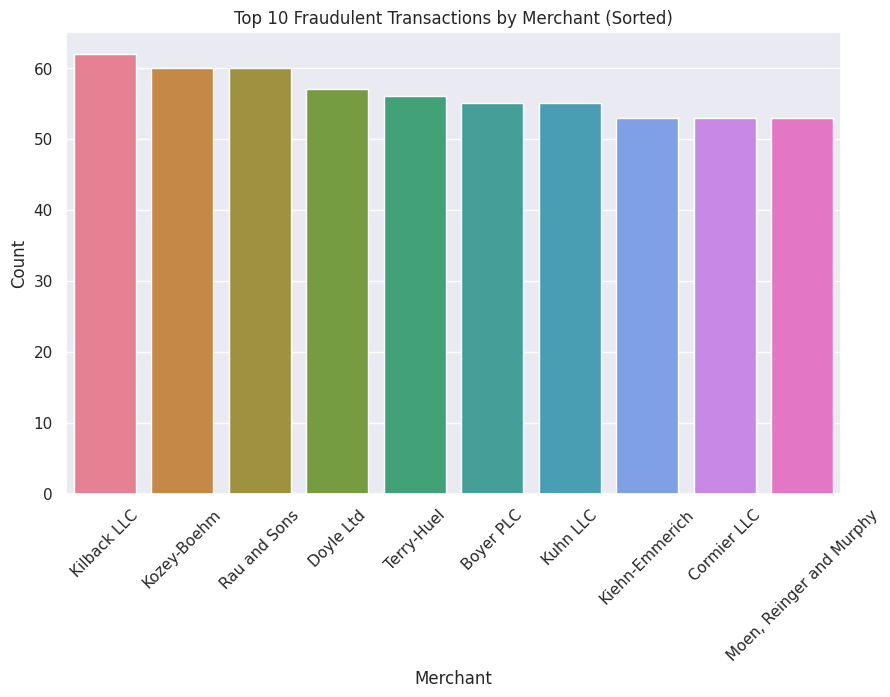

In [ ]:
# Calculate the count of each merchant and sort in descending order for fraudulent transactions
merchant_counts = df[df['is_fraud'] == 1].merchant.value_counts().sort_values(ascending=False)

# Select the top 10 merchants
top_10_merchants = merchant_counts.head(10)

# Create a count plot for top 10 merchants with multiple colors
plt.figure(figsize=(10, 6))

# Define a custom color palette or use a predefined palette
colors = sns.color_palette('husl', len(top_10_merchants))

# Create the bar plot with the color palette
sns.barplot(x=top_10_merchants.index, y=top_10_merchants.values, palette=colors)

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.title('Top 10 Fraudulent Transactions by Merchant (Sorted)')
plt.show()


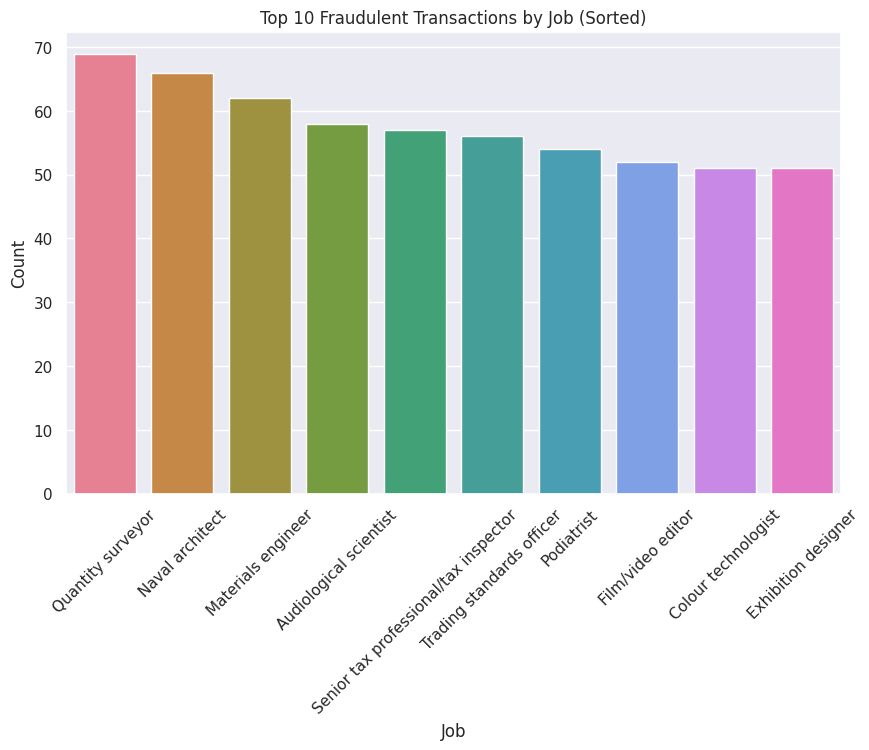

In [ ]:
# Calculate the count of each job and sort in descending order for fraudulent transactions
job_counts = df[df['is_fraud'] == 1].job.value_counts().sort_values(ascending=False)

# Select the top 10 jobs
top_10_jobs = job_counts.head(10)

# Create a count plot for top 10 jobs with multiple colors
plt.figure(figsize=(10, 6))

# Define a custom color palette or use a predefined palette
colors = sns.color_palette('husl', len(top_10_jobs))

# Create the bar plot with the color palette
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette=colors)

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Top 10 Fraudulent Transactions by Job (Sorted)')
plt.show()


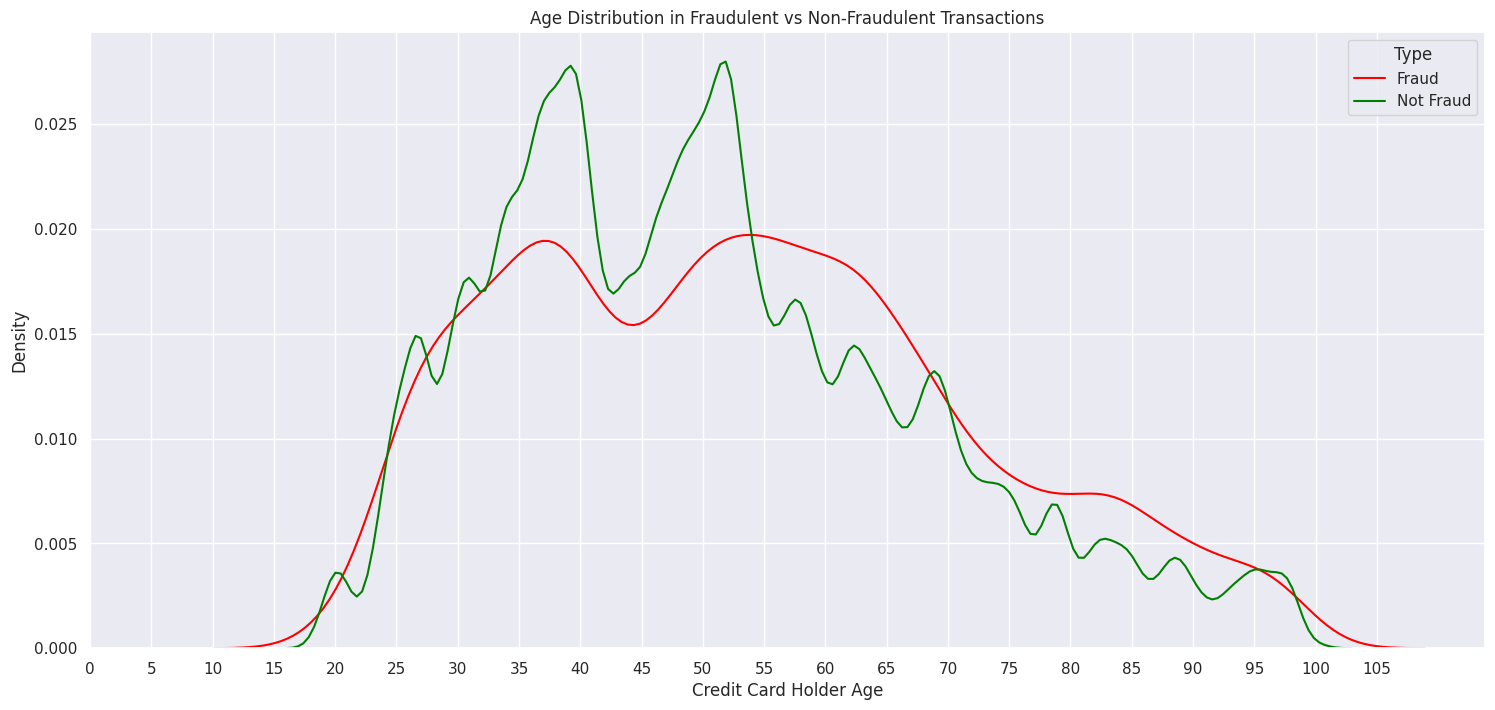

In [ ]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False, palette={1: 'red', 0: 'green'})
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

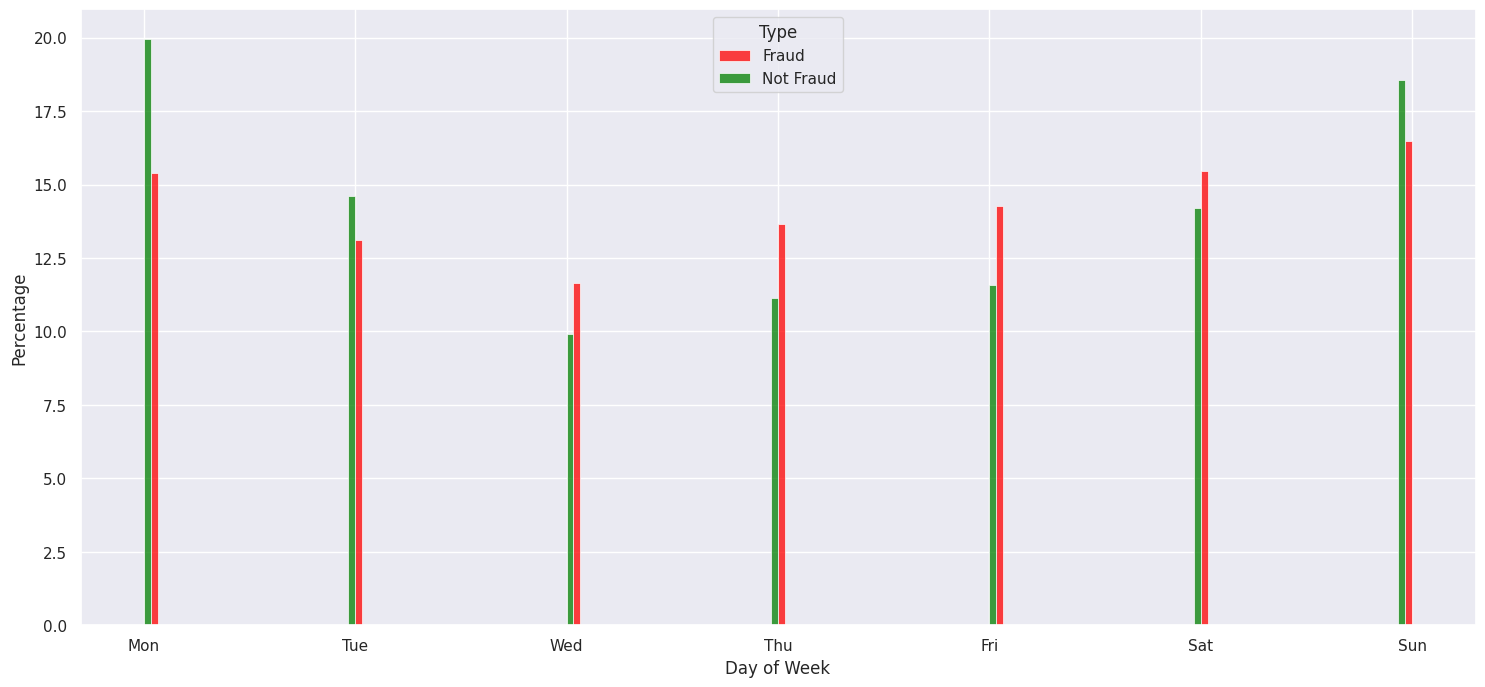

In [ ]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge', palette={1: 'red', 0: 'green'})
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

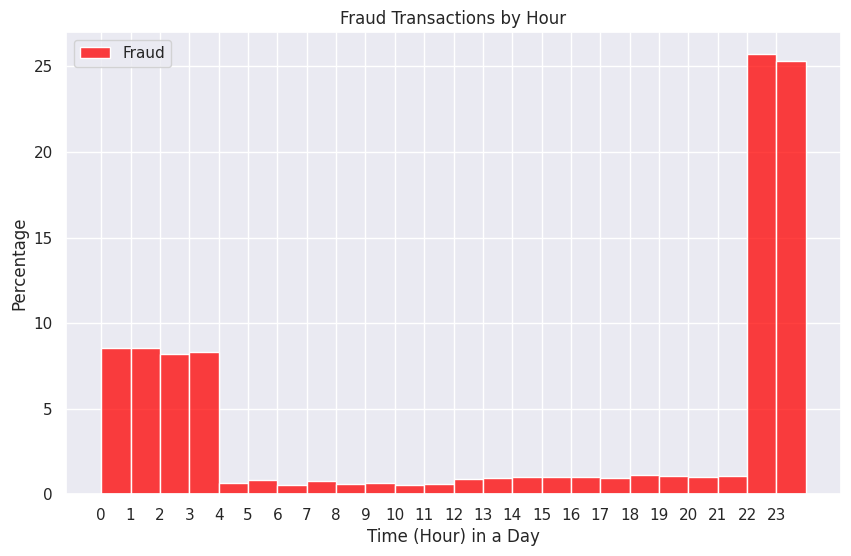

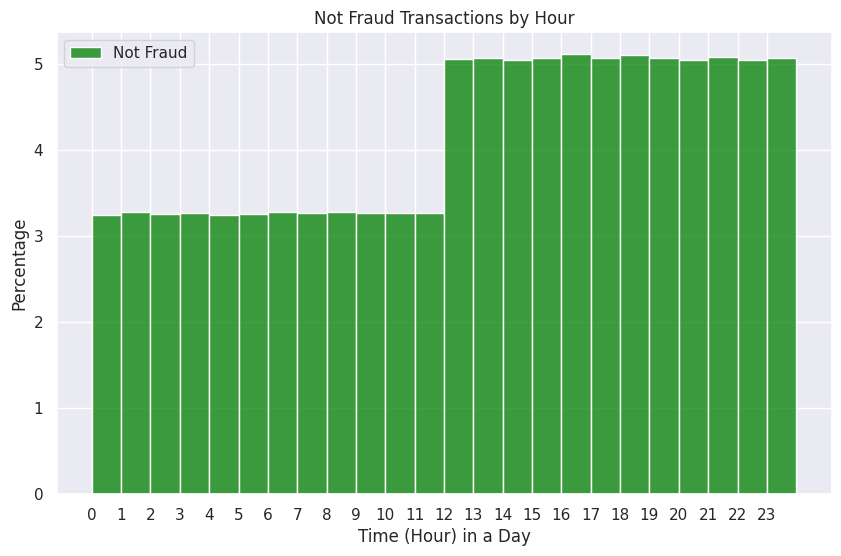

In [ ]:
# Create 'hour' column from 'trans_date_trans_time'
df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour

# Plot for fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['is_fraud'] == 1], x="hour", color="red", stat='percent', bins=np.arange(0, 25, 1), label="Fraud")
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Time (Hour) in a Day')
plt.ylabel('Percentage')
plt.title('Fraud Transactions by Hour')
plt.legend()
plt.show()

# Plot for non-fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['is_fraud'] == 0], x="hour", color="green", stat='percent', bins=np.arange(0, 25, 1), label="Not Fraud")
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Time (Hour) in a Day')
plt.ylabel('Percentage')
plt.title('Not Fraud Transactions by Hour')
plt.legend()
plt.show()


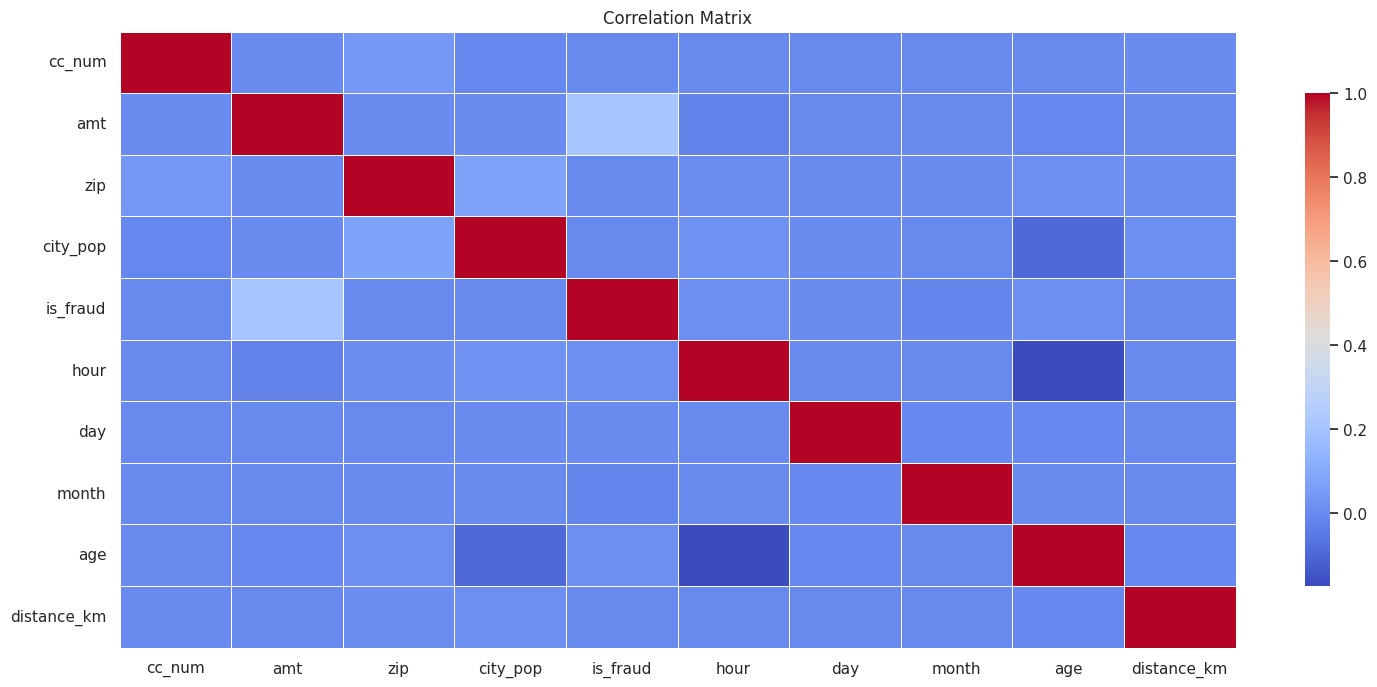

In [ ]:
#Check corr between numeric values
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=None,cmap='coolwarm',fmt='.2f',linewidths=0.5,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,split,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0,train,0,1,1,36,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0,train,0,1,1,46,30.21
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,1962-01-19,0,train,0,1,1,62,108.21
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,1967-01-12,0,train,0,1,1,57,95.67
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,1986-03-28,0,train,0,1,1,38,77.56


In [ ]:
#We can't detect a clear corr between features
df.select_dtypes(include='number').corr()

,cc_num,amt,zip,city_pop,is_fraud,hour,day,month,age,distance_km
cc_num,1.000000,0.001826,0.041504,-0.009118,-0.001125,-0.000902,-0.000851,-0.000188,-0.000143,0.003082
amt,0.001826,1.000000,0.001979,0.004921,0.209308,-0.024891,0.000491,-0.002593,-0.010662,-0.000538
zip,0.041504,0.001979,1.000000,0.077601,-0.002190,0.005947,-0.001021,0.001160,0.010347,0.006750
city_pop,-0.009118,0.004921,0.077601,1.000000,0.000325,0.019949,0.001180,-0.000510,-0.090867,0.010989
is_fraud,-0.001125,0.209308,-0.002190,0.000325,1.000000,0.013196,0.004562,-0.016417,0.011103,0.000359
hour,-0.000902,-0.024891,0.005947,0.019949,0.013196,1.000000,0.000584,-0.000986,-0.173053,0.000391
day,-0.000851,0.000491,-0.001021,0.001180,0.004562,0.000584,1.000000,-0.004958,-0.006613,-0.000092
month,-0.000188,-0.002593,0.001160,-0.000510,-0.016417,-0.000986,-0.004958,1.000000,0.000039,-0.000067
age,-0.000143,-0.010662,0.010347,-0.090867,0.011103,-0.173053,-0.006613,0.000039,1.000000,-0.004142
distance_km,0.003082,-0.000538,0.006750,0.010989,0.000359,0.000391,-0.000092,-0.000067,-0.004142,1.000000


##### Get in depth in data

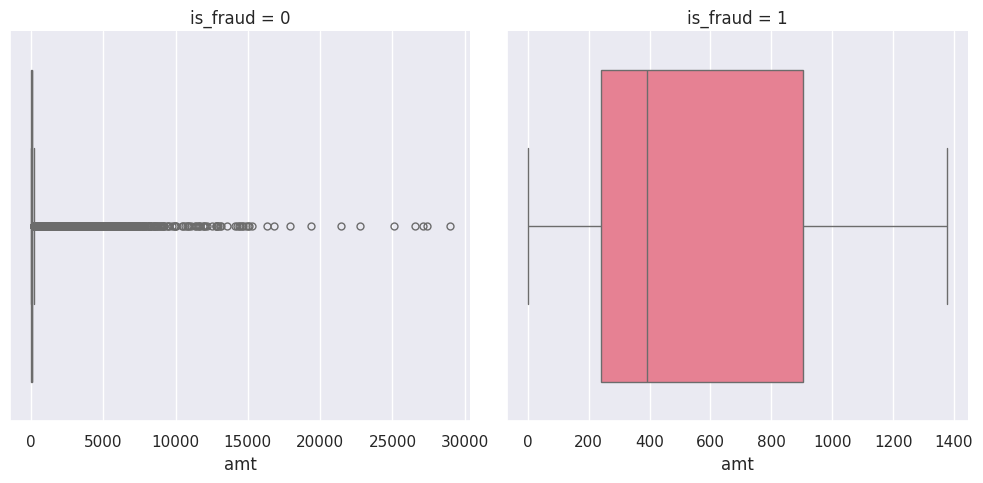

In [ ]:
# Add color to the box plot
sns.catplot(data=df, x='amt', col='is_fraud', kind='box', sharex=False, palette='husl')

# Show the plot
plt.show()


In [ ]:
#We detect a huge number of outliers in the amounts of genuine transaction
#We will handle that in the scaling process since we can't remove them
#Because they represent real data

In [ ]:
#We discover that is_fraud column is imbalanced.
#So will fix that later

#### We conclude that most fraud transactions occurs:
- On March
- On Sunday
- At 10 PM

In [ ]:
df.loc[df['is_fraud']==1,['gender']].value_counts()
#Males and females exposed to fraud equally (approximately)

,count
gender,
F,4899
M,4752


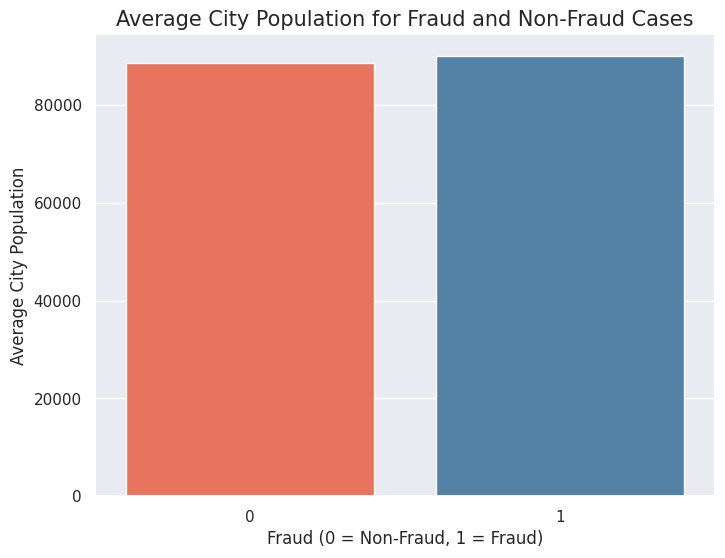

T-test: t-statistic = 0.443, p-value = 0.658, p-value < 0.05? False


In [ ]:
# Add colors to the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.barplot(data=df, x='is_fraud', y='city_pop', ci=None, palette=['#FF6347', '#4682B4'])  # Add custom colors

# Add title and labels
plt.title('Average City Population for Fraud and Non-Fraud Cases', fontsize=15)
plt.xlabel('Fraud (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Average City Population')

# Display the plot
plt.show()

# Perform t-test for population differences between fraud and non-fraud cases
fraud_population = df[df['is_fraud'] == 1]['city_pop']
non_fraud_population = df[df['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)

# Print the results of the t-test
print(f'T-test: t-statistic = {round(t_stat, 3)}, p-value = {round(p_value, 3)}, p-value < 0.05? {p_value < 0.05}')


In [ ]:
#Since we accept the null hypothesis,we conclude that there is no significant difference between means,
#We conclude also that city_population does not help us on the target(is_fraud), so we will drop it

# Further Preprocessing

In [ ]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,split,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0,train,0,1,1,36,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0,train,0,1,1,46,30.21
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,1962-01-19,0,train,0,1,1,62,108.21


In [ ]:
#Convert gender to binary classification
df = pd.get_dummies(df,columns=['gender'],drop_first=True)

In [ ]:
#We will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))

In [ ]:
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df['hours_diff_bet_trans'] = df['hours_diff_bet_trans'].astype(int)

                T          p-val
T-test  27.266899  7.200860e-158


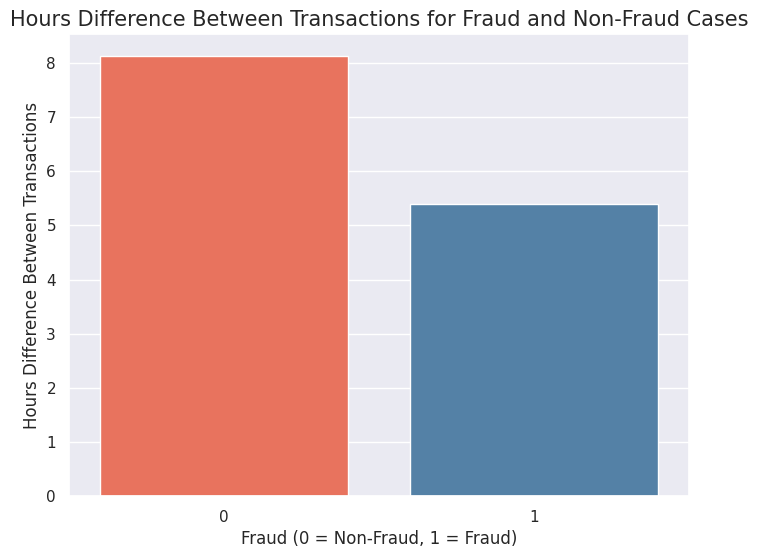

In [ ]:
# x_0=df.groupby('is_fraud')['hours_diff_bet_trans'].mean().values[0]
# x_1=df.groupby('is_fraud')['hours_diff_bet_trans'].mean().values[1]
# std_0=df.groupby('is_fraud')['hours_diff_bet_trans'].std().values[0]
# std_1=df.groupby('is_fraud')['hours_diff_bet_trans'].std().values[1]
# n_0=df.groupby('is_fraud')['hours_diff_bet_trans'].count().values[0]
# n_1=df.groupby('is_fraud')['hours_diff_bet_trans'].count().values[1]
# numerator = x_0 - x_1
# domin = np.sqrt(std_0**2/n_0 + std_1**2/n_1)
# t_stat=numerator/domin
# p_val = 2*(1-t.cdf(abs(t_stat),df=n_0+n_1-2))
# print(t_stat,p_val)
#----------------------
#The power of pingouin library!
print(pingouin.ttest(df[df['is_fraud'] == 0]['hours_diff_bet_trans'],
              df[df['is_fraud'] == 1]['hours_diff_bet_trans'],
              alternative='two-sided')[['T','p-val']])
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.barplot(data=df, x='is_fraud', y='hours_diff_bet_trans', ci=None, palette=['#FF6347', '#4682B4'])  # Add custom colors

# Add title and labels (optional)
plt.title('Hours Difference Between Transactions for Fraud and Non-Fraud Cases', fontsize=15)
plt.xlabel('Fraud (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Hours Difference Between Transactions')

# Display the plot
plt.show()

In [ ]:
#Since p-val < 0.05,we reject the null hypothesis.
#The mean of hours is significantly different between frauds and non-frauds transactions

In [ ]:
#Make day feature numerical
df['day'] = df['trans_date_trans_time'].dt.weekday

In [ ]:
#Handling and extracting features from cc_num
freq = df.groupby('cc_num').size()
df['cc_freq'] = df['cc_num'].apply(lambda x : freq[x])
df[['cc_num','cc_freq']].head()

,cc_num,cc_freq
1017,60416207185,2196
2724,60416207185,2196
2726,60416207185,2196
2882,60416207185,2196
2907,60416207185,2196


In [ ]:
#We got freq for each cc_num
def hist_show(col):
    fig,axs = plt.subplots(1,2,sharex=True)
    for i in [0,1]:
        sns.histplot(df[df["is_fraud"]==i][col], bins=6,ax=axs[i])

In [ ]:
def class_det(x):
    for idx,val in enumerate(list(range(800,5000,800))):
        if x < val:
            return idx+1

In [ ]:
df['cc_freq_class'] = df['cc_freq'].apply(class_det)
print(df['cc_freq_class'].unique())

[3 1 2 4 5 6]


#### Now clearly frauds occurs more in credit cards with less use (new ones) and for genuine transactions, it follows a normal distribution.

In [ ]:
#Drop unecessary columns
df.drop(columns=['trans_date_trans_time','city_pop'],inplace=True)

In [ ]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'city', 'zip', 'job', 'dob',
       'is_fraud', 'split', 'hour', 'day', 'month', 'age', 'distance_km',
       'gender_M', 'hours_diff_bet_trans', 'cc_freq', 'cc_freq_class'],
      dtype='object')

In [ ]:
#Reorder columns
df = df[['cc_freq','cc_freq_class','city','job','age','gender_M','merchant', 'category',
         'distance_km','month','day','hour','hours_diff_bet_trans','amt','is_fraud','split']]
df.head()

,cc_freq,cc_freq_class,city,job,age,gender_M,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud,split
1017,2196,3,Fort Washakie,Information systems manager,38,False,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27,0,train
2724,2196,3,Fort Washakie,Information systems manager,38,False,Berge LLC,gas_transport,110.31,1,2,8,19,52.94,0,train
2726,2196,3,Fort Washakie,Information systems manager,38,False,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08,0,train
2882,2196,3,Fort Washakie,Information systems manager,38,False,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79,0,train
2907,2196,3,Fort Washakie,Information systems manager,38,False,Beier and Sons,home,74.21,1,2,13,0,27.18,0,train


In [ ]:
# #We will encode ('city','job','merchant', 'category') preparing for our model using WOE encoder
# for col in ['city','job','merchant', 'category']:
#     df[col] = WOEEncoder().fit_transform(df[col],df['is_fraud'])

In [ ]:
import joblib

In [ ]:
# Initialize the WOE encoder
encoder = WOEEncoder()

# Fit and transform the data for specified columns
df[['city', 'job', 'merchant', 'category']] = encoder.fit_transform(df[['city', 'job', 'merchant', 'category']], df['is_fraud'])

# Save the encoder using joblib
joblib.dump(encoder, 'woe_encoder.joblib')

['woe_encoder.joblib']

In [ ]:
# WOE > 0: The category is more likely associated with (fraud)
# WOE < 0: The category is more likely associated with (non-fraud)
df.head()

,cc_freq,cc_freq_class,city,job,age,gender_M,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud,split
1017,2196,3,-0.193426,0.163804,38,False,0.472059,0.925860,127.61,1,1,12,0,7.27,0,train
2724,2196,3,-0.193426,0.163804,38,False,-0.499771,-0.238221,110.31,1,2,8,19,52.94,0,train
2726,2196,3,-0.193426,0.163804,38,False,-0.132212,-0.238221,21.79,1,2,8,0,82.08,0,train
2882,2196,3,-0.193426,0.163804,38,False,-0.620062,-1.019735,87.20,1,2,12,3,34.79,0,train
2907,2196,3,-0.193426,0.163804,38,False,-1.296190,-1.238421,74.21,1,2,13,0,27.18,0,train


In [ ]:
x_train = df[df['split']=='train'].drop(['split','is_fraud'],axis=1)
y_train = df[df['split']=='train']['is_fraud']
x_test = df[df['split']=='test'].drop(['split','is_fraud'],axis=1)
y_test = df[df['split']=='test']['is_fraud']

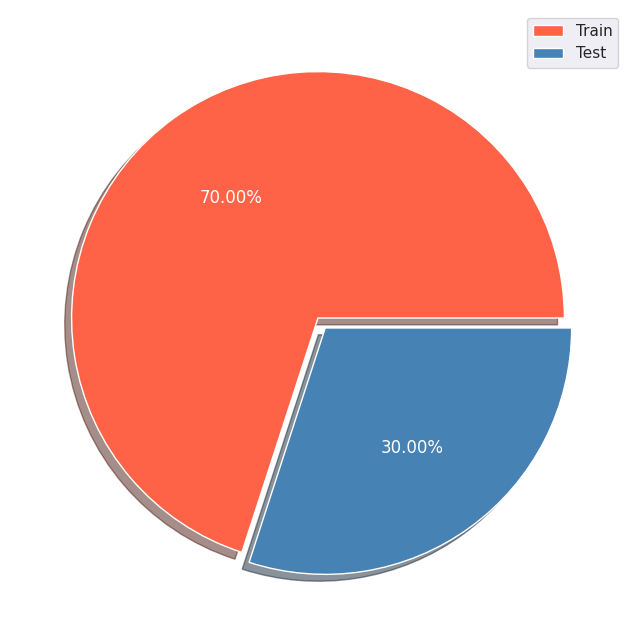

In [ ]:
# Create a larger plot and add custom colors
plt.figure(figsize=(8, 8))  # Increase the figure size to make the graph larger

# Define custom colors
colors = ['#FF6347', '#4682B4']  # Example: orange for train and blue for test

# Create the pie chart
plt.pie([len(x_train), len(x_test)], autopct='%.2f%%', textprops={'color': 'white'},
        explode=[0, 0.05], shadow=True, colors=colors)

# Add a legend
plt.legend(['Train', 'Test'])

# Show the plot
plt.show()


In [ ]:
#Handling outliers
x_train.select_dtypes(include='number').columns

Index(['cc_freq', 'cc_freq_class', 'city', 'job', 'age', 'merchant',
       'category', 'distance_km', 'month', 'day', 'hour',
       'hours_diff_bet_trans', 'amt'],
      dtype='object')

In [ ]:
datasets={'x_train':x_train,'x_test':x_test}
cols = ['hours_diff_bet_trans', 'amt']

In [ ]:
#Outliers in train data before scaling
def count_outliers(l:list):
    for col in l:
        print(f'Outliers In {col}:',len(detect_outliers(x_train,0,[col])))

In [ ]:
def boxplot_outliers(ds:dict):
    plt.figure(figsize=(18,8))
    c=1
    for _,df_x in ds.items():
        for col in ['hours_diff_bet_trans', 'amt']:
            plt.subplot(2,2,c)
            df_x[col].plot(kind='box',vert=False)
            c+=1
    plt.suptitle('Detecting Outliers In Train|Test Data',fontsize=20)
    plt.tight_layout()

Outliers In hours_diff_bet_trans: 86989
Outliers In amt: 67290


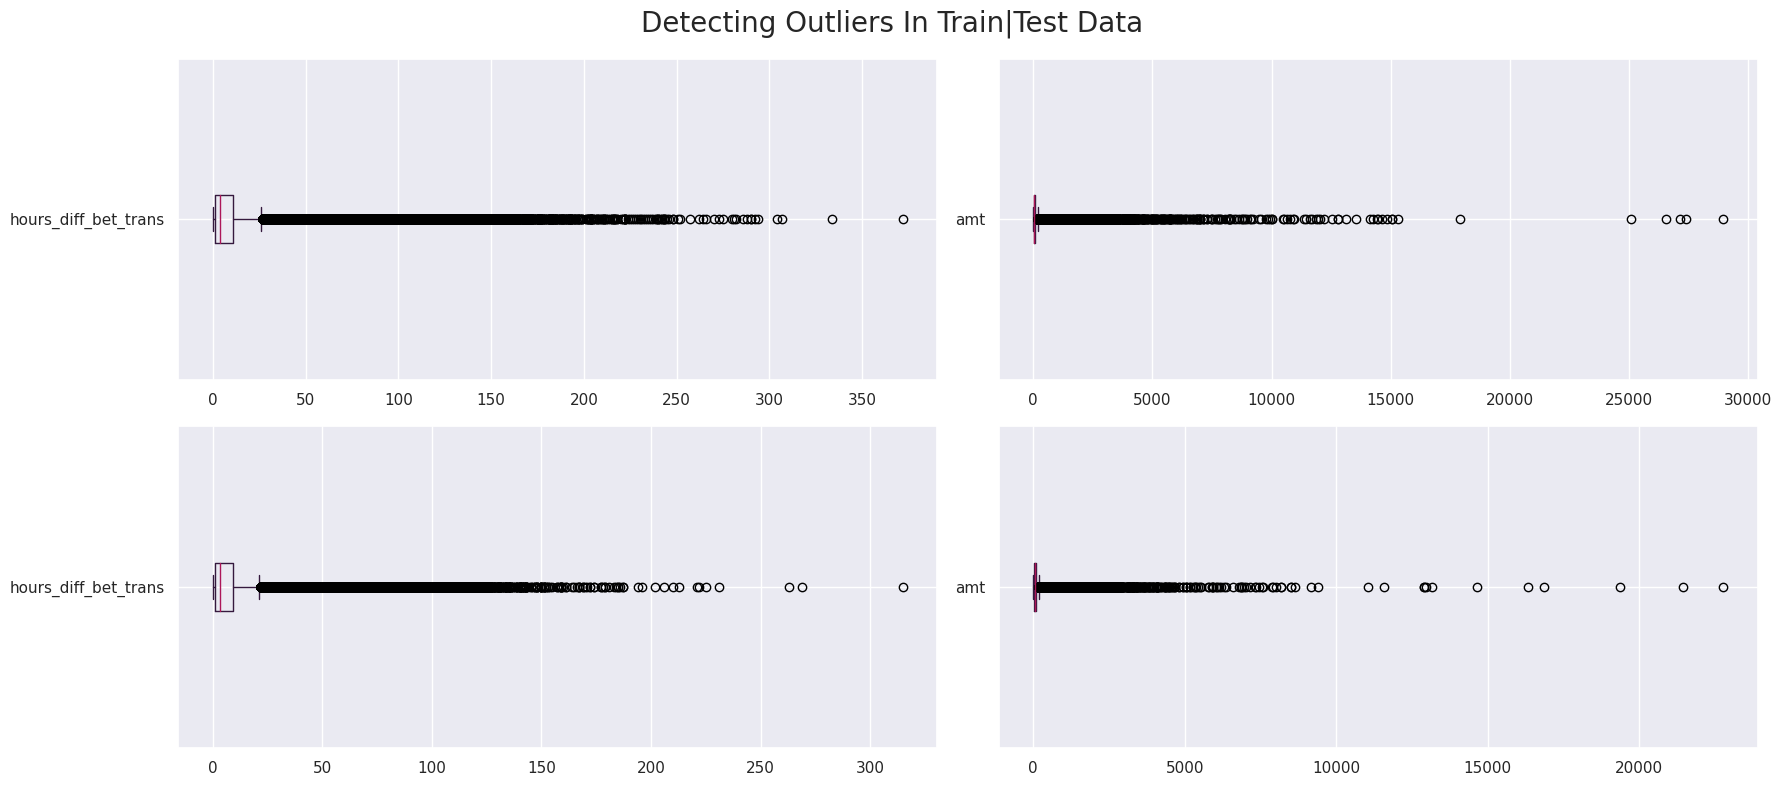

In [ ]:
count_outliers(cols)
boxplot_outliers(datasets)

In [ ]:
#Applying log scale
for col in cols:
    x_train[col] = np.log1p(x_train[col])
    x_test[col] = np.log1p(x_test[col])

Outliers In hours_diff_bet_trans: 222
Outliers In amt: 818


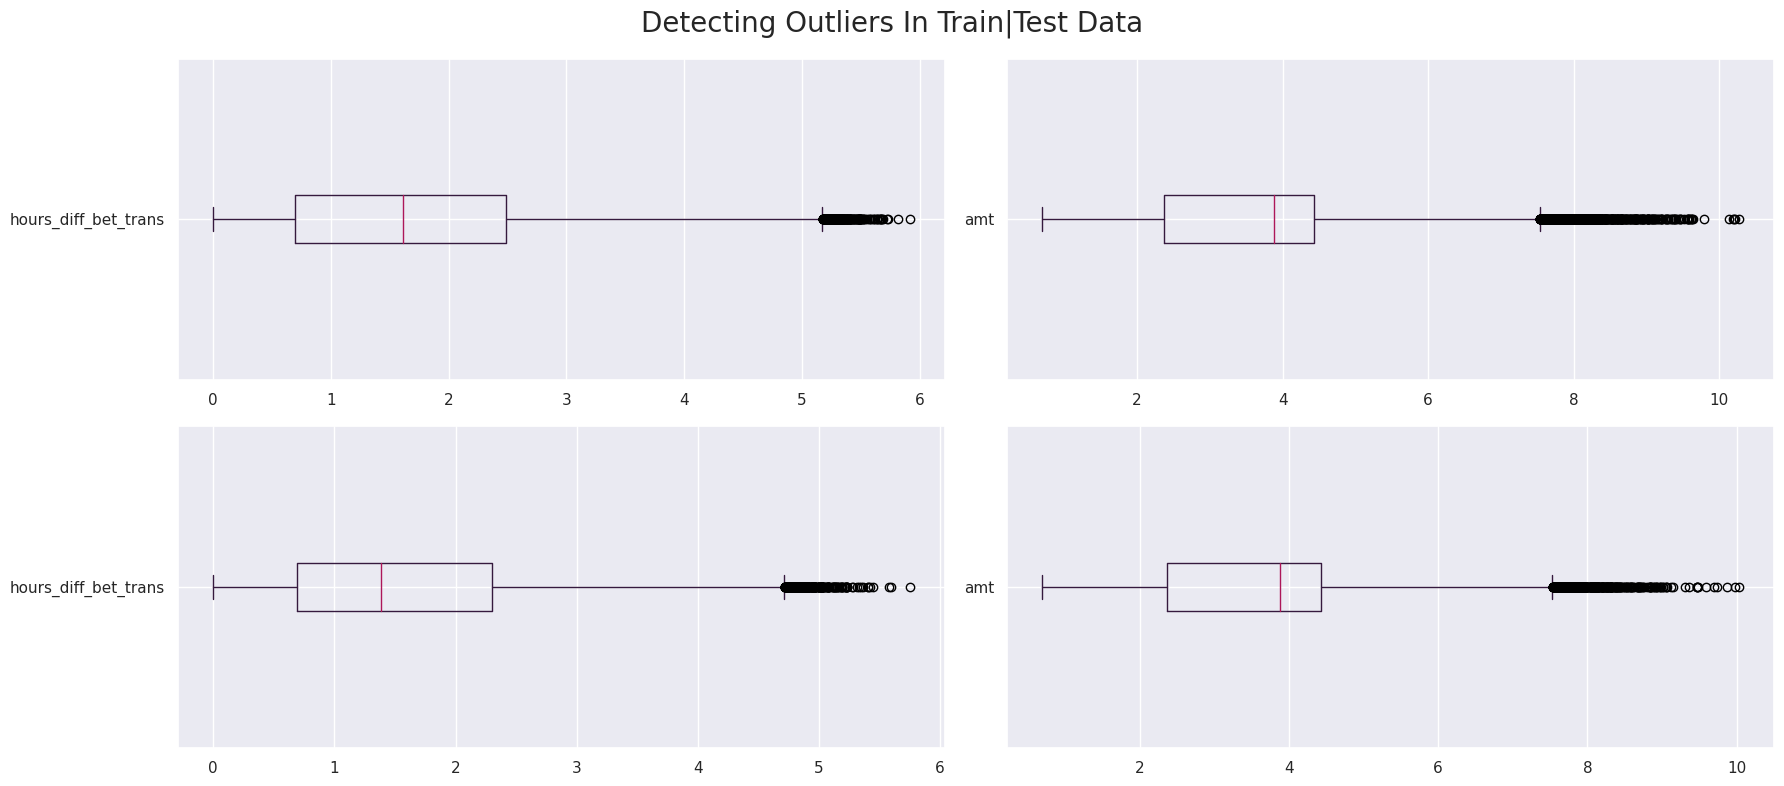

In [ ]:
count_outliers(cols)
boxplot_outliers(datasets)

#### As we can see the log transformation make the distribution more symmetric and reduce the impact of extreme values(We did not removed them).Also we can deal with these data separately,But for now: log functions are commonly used to handle right-skewed distributions. After applying our model we can revert data with exp. function to recover the actual data.

In [ ]:
x_train.head()

,cc_freq,cc_freq_class,city,job,age,gender_M,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt
1017,2196,3,-0.193426,0.163804,38,False,0.472059,0.925860,127.61,1,1,12,0.000000,2.112635
2724,2196,3,-0.193426,0.163804,38,False,-0.499771,-0.238221,110.31,1,2,8,2.995732,3.987872
2726,2196,3,-0.193426,0.163804,38,False,-0.132212,-0.238221,21.79,1,2,8,0.000000,4.419804
2882,2196,3,-0.193426,0.163804,38,False,-0.620062,-1.019735,87.20,1,2,12,1.386294,3.577669
2907,2196,3,-0.193426,0.163804,38,False,-1.296190,-1.238421,74.21,1,2,13,0.000000,3.338613


In [ ]:
#Note:-
#Logistic Regression often benefits from feature scaling.Since the algorithm uses the weights assigned to features during
#training, and having features on similar scales can help the optimization process converge faster.
#While Decision Trees, including Random Forest (an ensemble of decision trees), are generally not sensitive to the scale of the
#features.They make decisions based on splitting criteria and don't rely on the absolute values of the features.
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
joblib.dump(scaler, 'standard_scaler.joblib')
print("Scaler saved as: standard_scaler.joblib")

Scaler saved as: standard_scaler.joblib


# Model Building

#### We want to avoid false negatives as much as possible.A false negative case means that a fraud-positive transaction is assessed to genuine transaction,In this use case false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud. So our focus is about (RECALL).

In [ ]:
def evl_model(xtrain, ytrain, xtest, ytest, model, model_name):
    sns.set(rc={'figure.figsize': (18, 6)})

    print('Model : ' + model_name)
    print('_' * 30)

    start = time()

    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)
    end = time()

    # Plot results
    fig, axs = plt.subplots(1, 2)

    # Confusion Matrix
    cm = confusion_matrix(ytest, y_pred, labels=model.classes_)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cmd.plot(colorbar=False, ax=axs[0])
    axs[0].grid(False)

    # AUC-ROC Curve
    if hasattr(model, "predict_proba"):  # Check if model supports probability prediction
        y_proba = model.predict_proba(xtest)
        fpr, tpr, _ = roc_curve(ytest, y_proba[:, 1])
        RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axs[1])
        axs[1].plot([0, 1], [0, 1], color='g')

    plt.tight_layout()
    plt.show()

    # Model evaluation metrics
    print('Recall Score: ', recall_score(ytest, y_pred))
    print('Precision: ', precision_score(ytest, y_pred))
    print('F1-Score: ', f1_score(ytest, y_pred))
    print('Accuracy Score: ', accuracy_score(ytest, y_pred))

    if hasattr(model, "predict_proba"):
        print('AUC Score: ', roc_auc_score(ytest, y_proba[:, 1]))

    print('Running Time : ', round((end - start) / 60.0, 2), 'Mins')
    print('*' * 30)

    return model


In [ ]:
# import pickle

In [ ]:
# def save_model(model, name):
#   # Save the model using pickle
#         model_filename = f'{name}_saved.pkl'
#         with open(model_filename, 'wb') as f:
#             pickle.dump(model, f)
#         print(f'Model saved as: {model_filename}')
#         print('*' * 30)

In [ ]:
import joblib

def save_model(model, name):
    """
    Save the model using joblib.

    Parameters:
    model : The machine learning model to be saved
    name : str, The name to be used for the saved model file

    Returns:
    None
    """
    # Save the model using joblib
    model_filename = f'{name}_saved.joblib'
    joblib.dump(model, model_filename)
    print(f'Model saved as: {model_filename}')
    print('*' * 30)

# Imbalance data
#Without resampleing

Model : Logistic Regression
______________________________


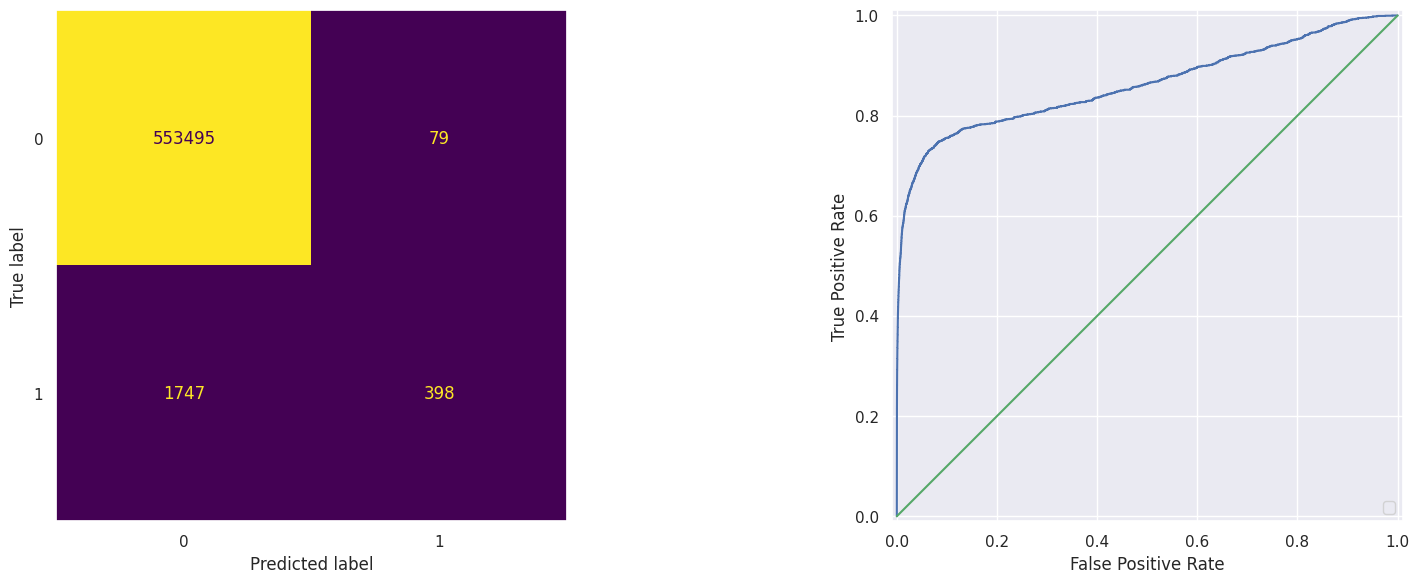

Recall Score:  0.18554778554778556
Precision:  0.8343815513626834
F1-Score:  0.30358504958047294
Accuracy Score:  0.9967141666921592
AUC Score:  0.8620645188587324
Running Time :  0.03 Mins
******************************


In [ ]:
model = evl_model(x_train, y_train, x_test, y_test, LogisticRegression(random_state=10), 'Logistic Regression')

In [ ]:
save_model(model, 'logistic regression')

Model saved as: logistic regression_saved.joblib
******************************


Model : Decision Tree
______________________________


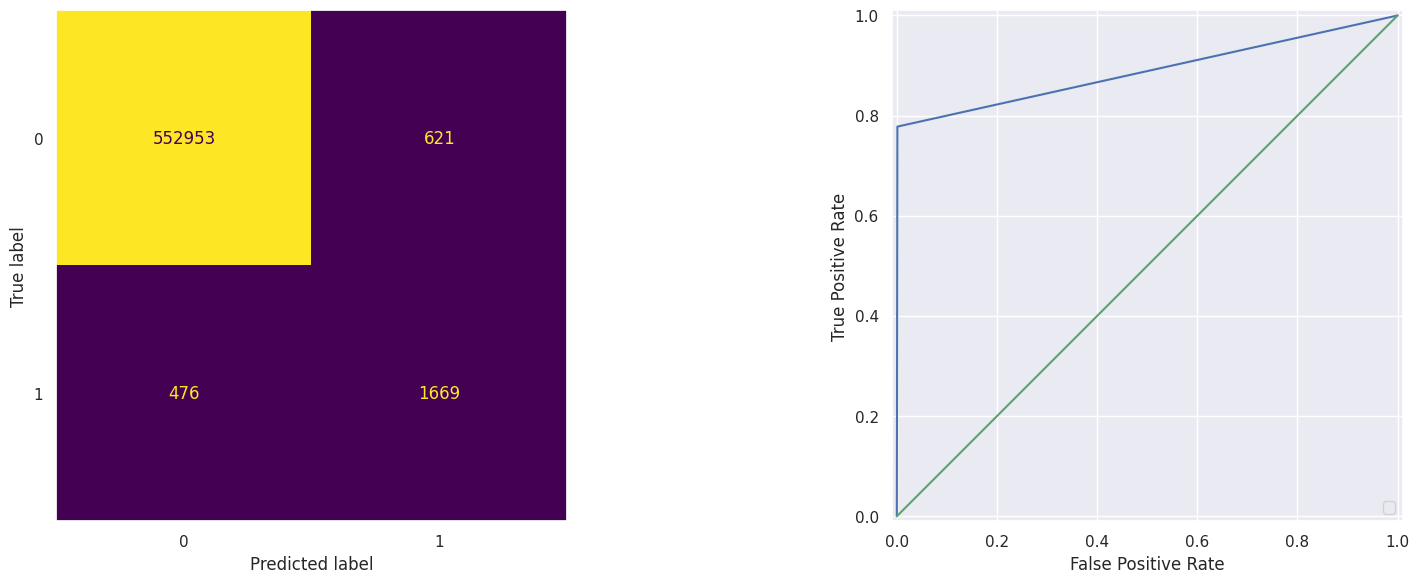

Recall Score:  0.7780885780885781
Precision:  0.72882096069869
F1-Score:  0.7526493799323563
Accuracy Score:  0.9980259807564614
AUC Score:  0.8884833884239566
Running Time :  0.32 Mins
******************************


DecisionTreeClassifier(random_state=10)

In [ ]:
evl_model(x_train, y_train, x_test, y_test, DecisionTreeClassifier(random_state=10), 'Decision Tree')

Model : Random Forest
______________________________


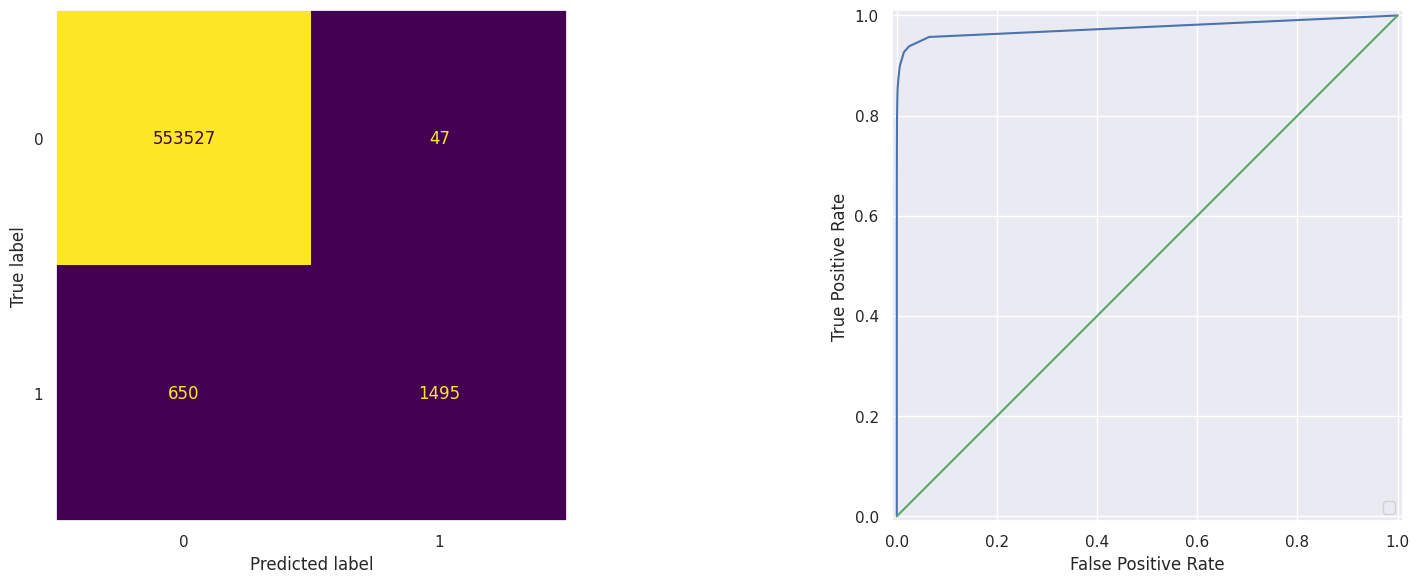

Recall Score:  0.696969696969697
Precision:  0.9695201037613489
F1-Score:  0.810957417954977
Accuracy Score:  0.9987457689947618
AUC Score:  0.9755984192670165
Running Time :  5.52 Mins
******************************


RandomForestClassifier(random_state=10)

In [ ]:
evl_model(x_train, y_train, x_test, y_test, RandomForestClassifier(random_state=10), 'Random Forest')

**Conclusions (From Imbalanced Data)**
- Logistic Regression : Gives a very weak recall accuracy
- Decision Tree : Gives the highest recall accuracy but has a low precision
- Random Forest : Gives high recall accuracy and high precision
- Note: Our focus is not on the total model accuracy (Confusion-Matrix Accuracy) TP+TN/TP+TN+FP+FN,Since we focus on the best accuracy for the model to predict the real fraud transaction and don't predict non-fraud and we detect it from the (True Positive Rate 'Recall')

# Oversampling using RandomOverSample

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

<Axes: ylabel='count'>

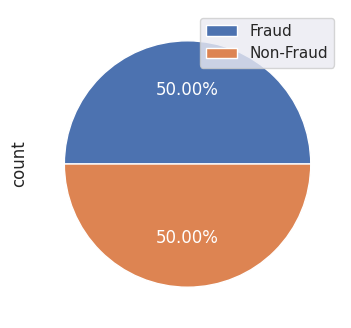

In [ ]:
y_train_resampled.value_counts().plot(kind='pie',figsize=(4,4),autopct='%.2f%%',textprops={'color':'white'},labels=['Fraud','Non-Fraud'],legend=True)

Model : Logistic Regression
______________________________


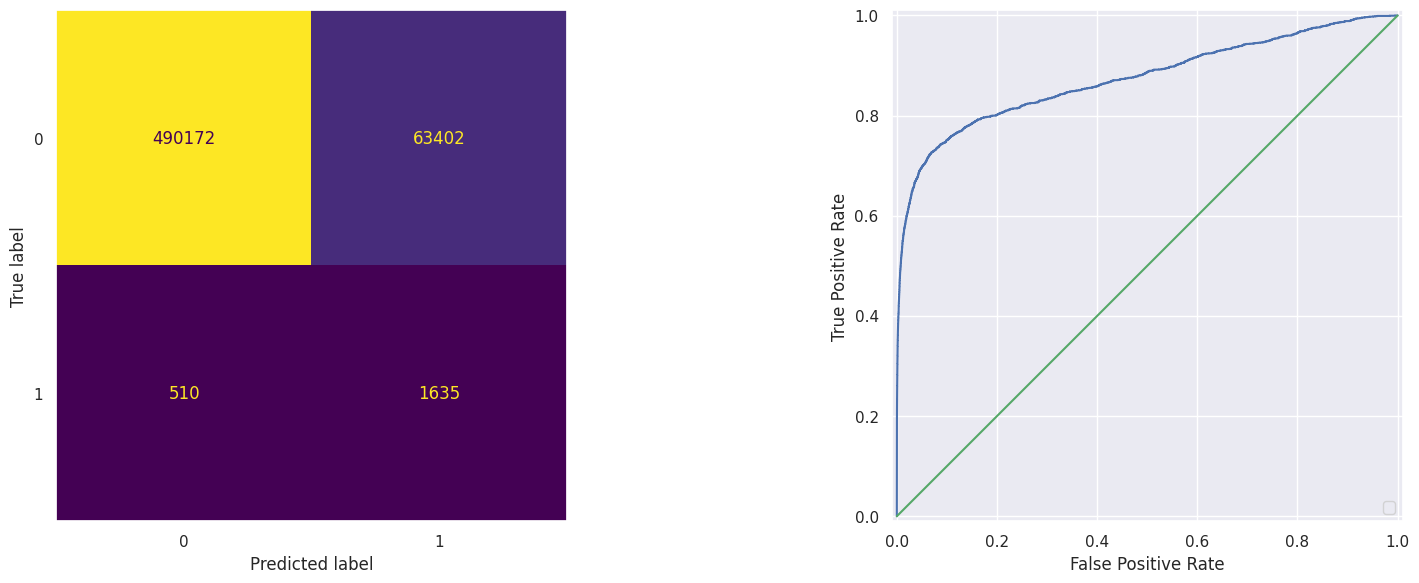

Recall Score:  0.7622377622377622
Precision:  0.025139535956455555
F1-Score:  0.04867375189782978
Accuracy Score:  0.8849922352843793
AUC Score:  0.8739576205725266
Running Time :  0.16 Mins
******************************


LogisticRegression(random_state=10)

In [ ]:
evl_model(x_train_resampled, y_train_resampled, x_test, y_test, LogisticRegression(random_state=10), 'Logistic Regression')

Model : Decision Tree
______________________________


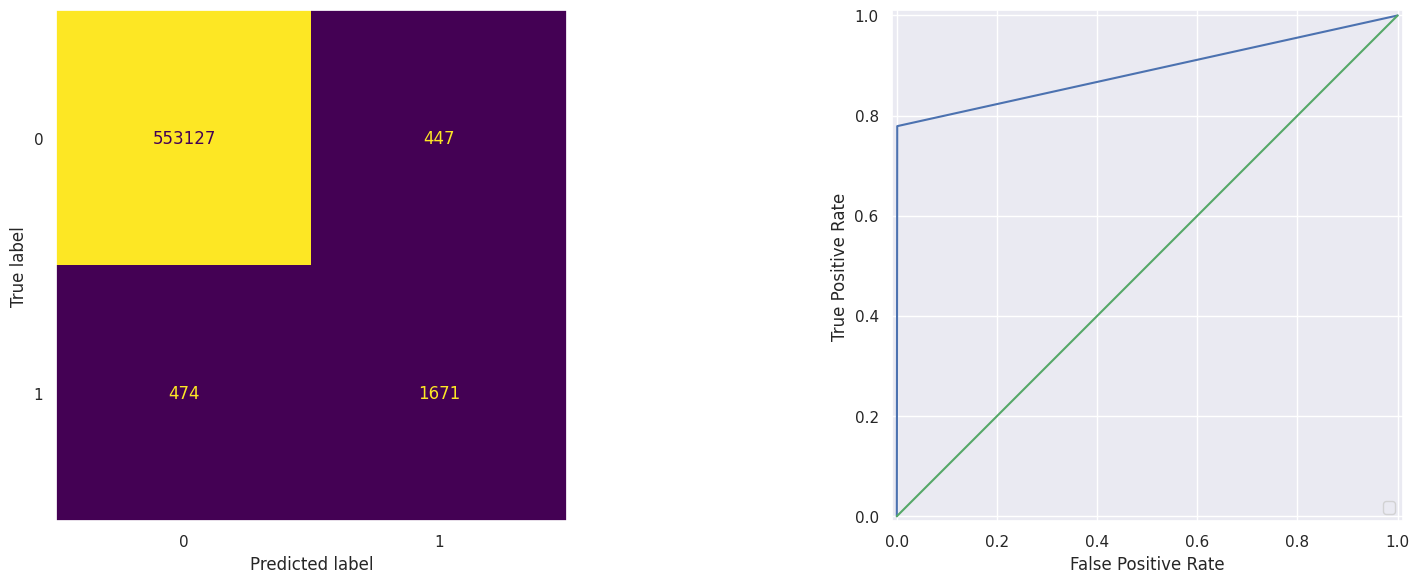

Recall Score:  0.779020979020979
Precision:  0.7889518413597734
F1-Score:  0.7839549612948628
Accuracy Score:  0.9983426875813136
AUC Score:  0.8891067494504433
Running Time :  0.51 Mins
******************************
Model saved as: decision tree_saved.joblib
******************************


In [ ]:
model = evl_model(x_train_resampled, y_train_resampled, x_test, y_test, DecisionTreeClassifier(random_state=10), 'Decision Tree')
save_model(model, 'decision tree')

Model : Random Forest
______________________________


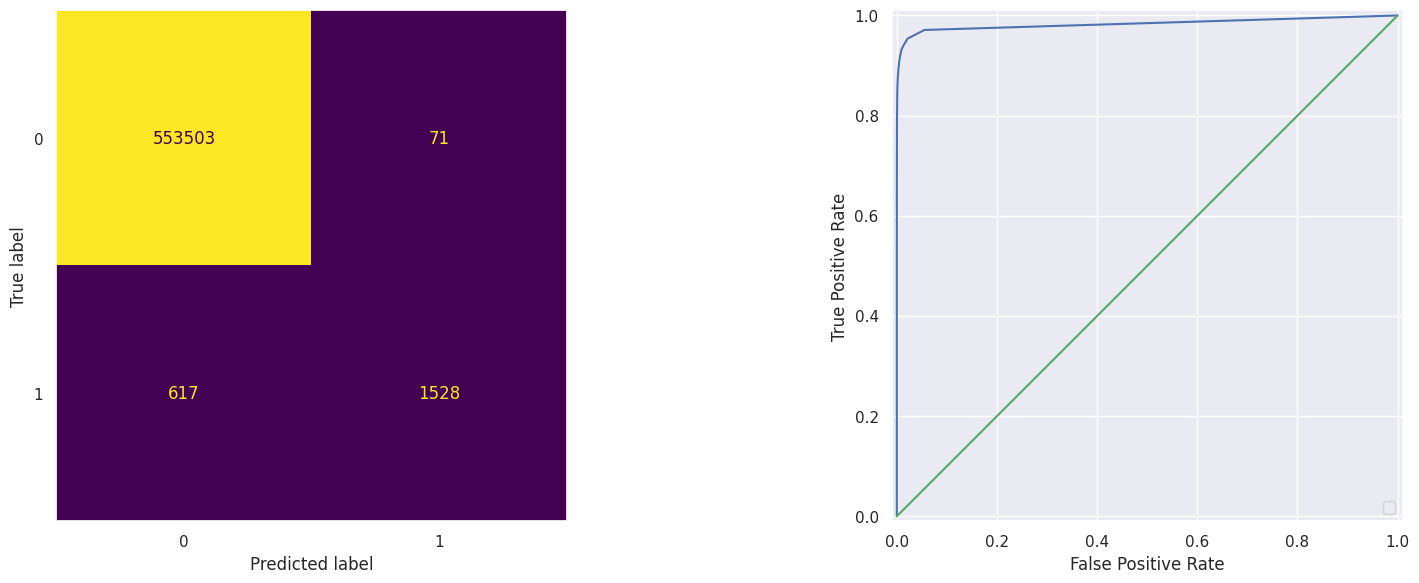

Recall Score:  0.7123543123543123
Precision:  0.9555972482801751
F1-Score:  0.8162393162393162
Accuracy Score:  0.9987619642301235
AUC Score:  0.9833871539721164
Running Time :  9.66 Mins
******************************


RandomForestClassifier(random_state=10)

In [ ]:
evl_model(x_train_resampled, y_train_resampled, x_test, y_test, RandomForestClassifier(random_state=10), 'Random Forest')

# Oversampling data using SMOTE

In [ ]:
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

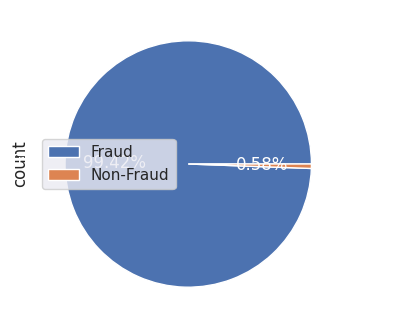

In [ ]:
y_train.value_counts().plot(kind='pie',figsize=(4,4),autopct='%.2f%%',textprops={'color':'white'},labels=['Fraud','Non-Fraud'],legend=True)

<Axes: ylabel='count'>

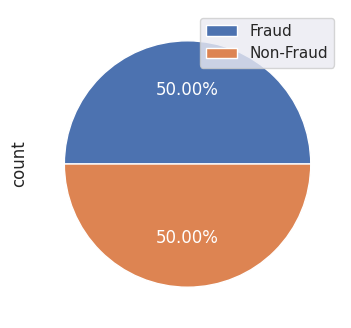

In [ ]:
y_train_smote.value_counts().plot(kind='pie',figsize=(4,4),autopct='%.2f%%',textprops={'color':'white'},labels=['Fraud','Non-Fraud'],legend=True)

Model : Logistic Regression
______________________________


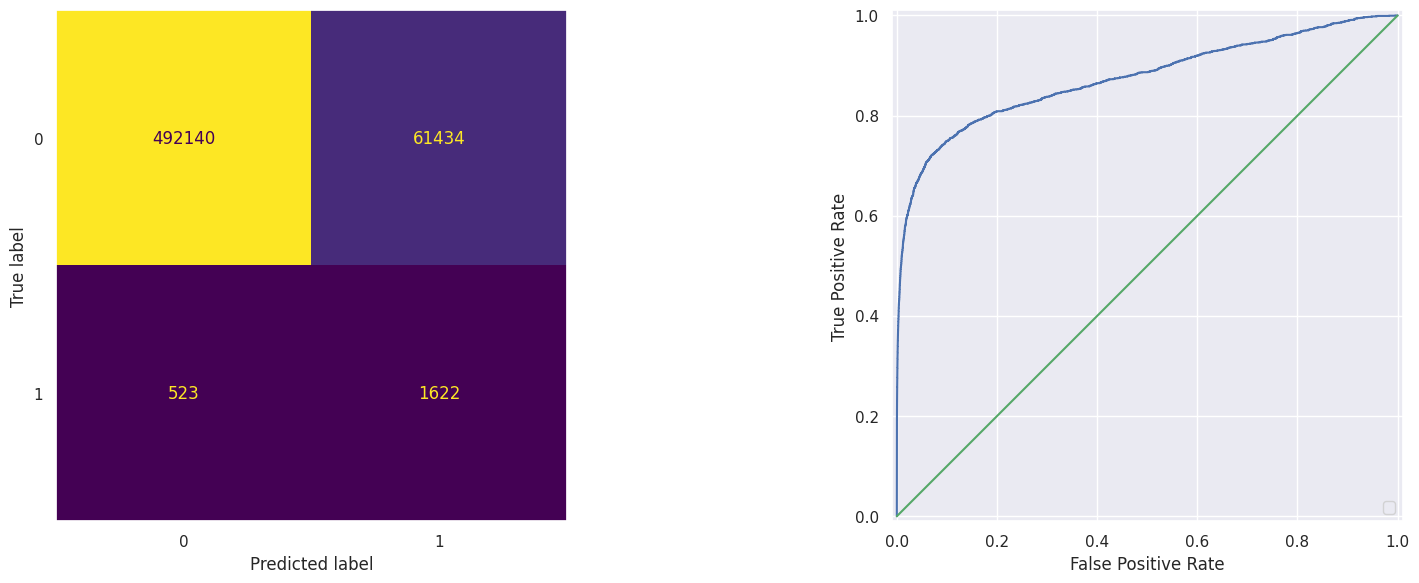

Recall Score:  0.7561771561771562
Precision:  0.025723166708957117
F1-Score:  0.04975383813131701
Accuracy Score:  0.888510200299072
AUC Score:  0.8748485592116254
Running Time :  0.19 Mins
******************************


LogisticRegression(random_state=10)

In [ ]:
evl_model(x_train_smote, y_train_smote, x_test, y_test, LogisticRegression(random_state=10), 'Logistic Regression')

Model : Decision Tree
______________________________


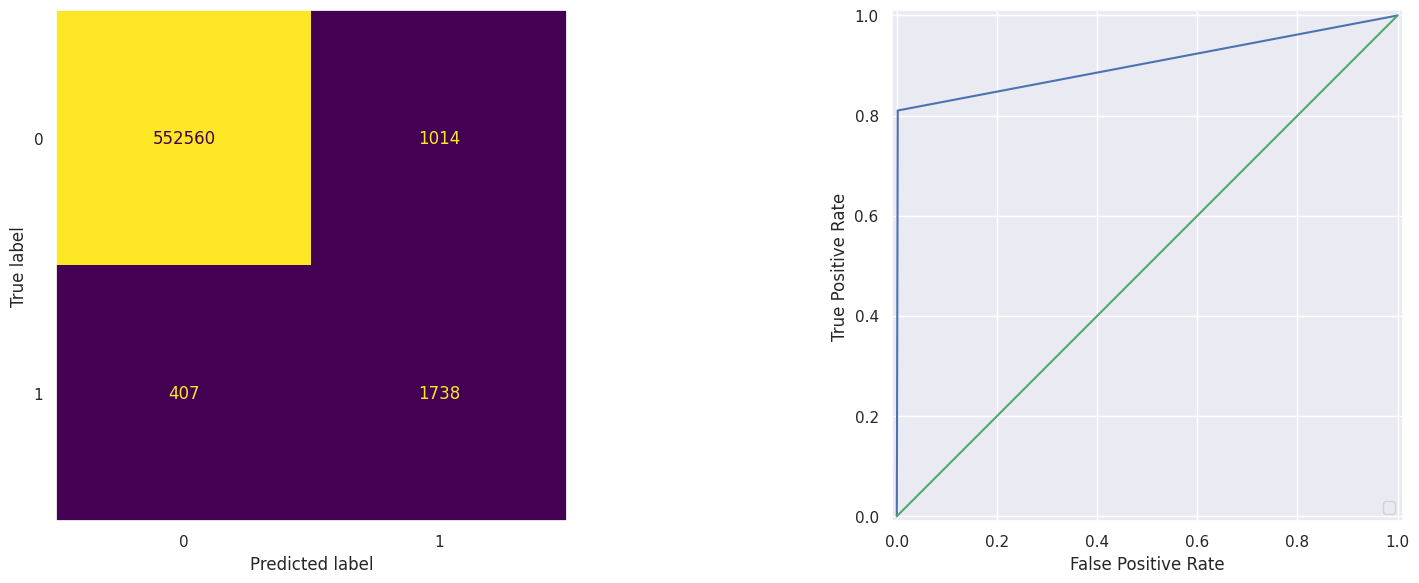

Recall Score:  0.8102564102564103
Precision:  0.6315406976744186
F1-Score:  0.7098223402082908
Accuracy Score:  0.9974429522834383
AUC Score:  0.9042123384148117
Running Time :  1.38 Mins
******************************


DecisionTreeClassifier(random_state=10)

In [ ]:
evl_model(x_train_smote, y_train_smote, x_test, y_test, DecisionTreeClassifier(random_state=10), 'Decision Tree')

Model : Random Forest
______________________________


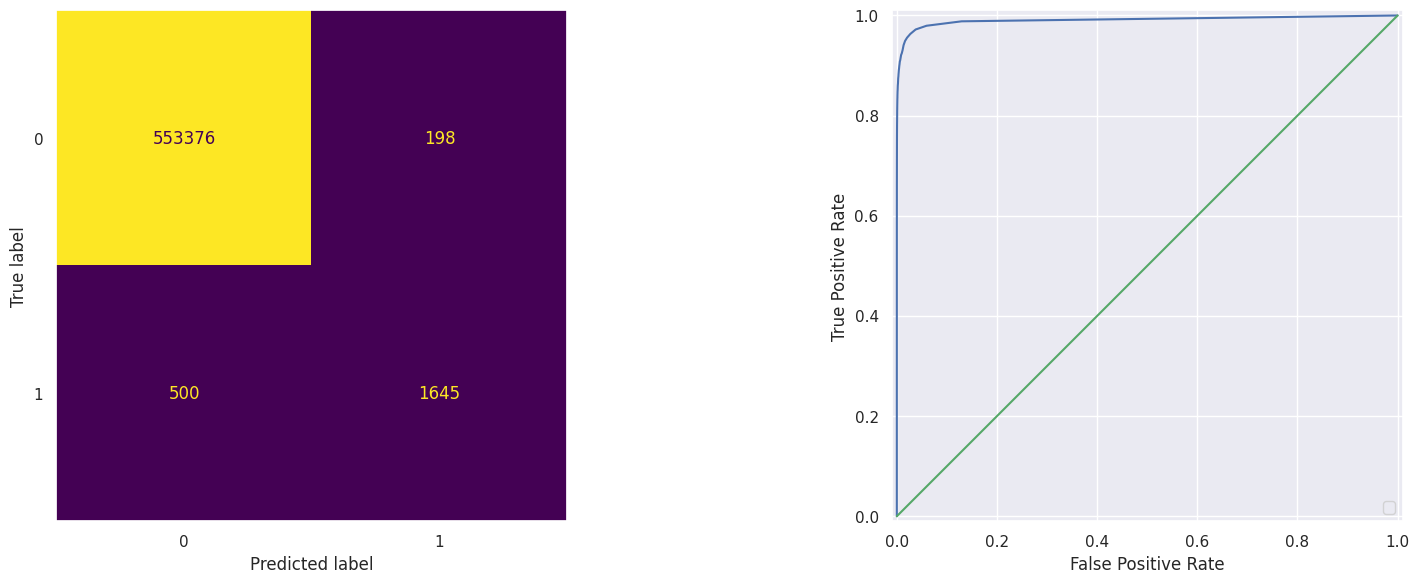

Recall Score:  0.7668997668997669
Precision:  0.8925664677156809
F1-Score:  0.824974924774323
Accuracy Score:  0.998743969524166
AUC Score:  0.9909031309097064
Running Time :  21.86 Mins
******************************


In [ ]:
model_random_forest = evl_model(x_train_smote, y_train_smote, x_test, y_test, RandomForestClassifier(random_state=10), 'Random Forest')

In [ ]:
save_model(model_random_forest, 'random forest')

Model saved as: random forest_saved.joblib
******************************


## Model Evaluation Considerations

### Recall (Sensitivity):

- High Recall is crucial in fraud detection to minimize the number of false negatives (missed fraud cases).
- A higher Recall indicates better sensitivity to detecting fraudulent transactions.

### Precision:

- Precision is important to minimize false positives.
- In fraud detection, a false positive might lead to inconveniencing legitimate customers.
- Balancing precision and recall is essential.

### F1-Score:

- F1-Score provides a balance between precision and recall.
- A higher F1-Score indicates a better balance between minimizing false positives and false negatives.

### Accuracy:

- While high accuracy is generally desirable, in imbalanced datasets (where fraud cases are rare), it might not be the most informative metric.
- A model could achieve high accuracy by predicting the majority class.

### AUC Score:

- AUC (Area Under the ROC Curve) provides a summary measure across various classification thresholds.
- A higher AUC indicates better overall model performance.

## Recommendation

- **RandomForest** appears to perform well across multiple metrics regardless it takes the higher time complexity, it provides a good balance between recall, precision, and accuracy.
- **DecisionTree** appears to perform well across recall , if we consider to minimize the number of false negatives (missed fraud cases) it will be the best solution, but it fails to make a good predictions on non-fraud transactions that might lead to inconveniencing legitimate customers
- **LogisticRegression** appears to perform well across recall, but gives a bad precision and accuracy so it's out of scope for our project